# LIC - 1. Modelo Fuzzy TSK

## Marco Túlio S. M. 
### 20193007156

In [12]:
# Util
import numpy as np
import random
import matplotlib.pyplot as plt

def plot_curve(x_values, res, error, epoch):
    plt.title(f"Curva Aproximada vs. Curva da função x^2 (Época: {epoch})") 
    plt.xlabel("x axis") 
    plt.ylabel("y axis")
    x = x_values
    y = x**2
    
    plt.plot(x, y, 'r', label="Curva x^2")
    plt.plot(x, res, 'g', label="Curva Aproximada")
    plt.legend()
    plt.text(-10, 0, f"erro: {error}")
    plt.show()

def calculate_fuzzy_tsk_parameters(x1_medio, sigma_1, x2_medio, sigma_2, x_i):
    w_1 = np.exp(-0.5 * ((x_i - x1_medio) / sigma_1)**2)
    w_2 = np.exp(-0.5 * ((x_i - x2_medio) / sigma_2)**2)
    return w_1, w_2

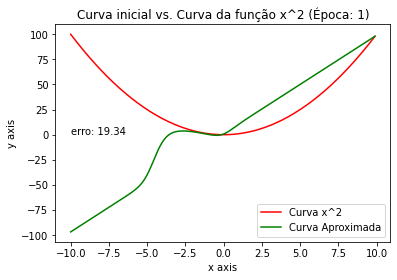

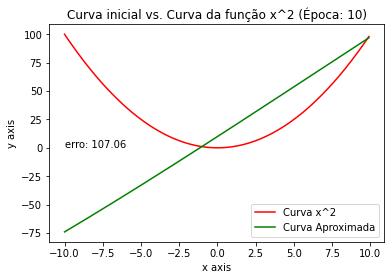

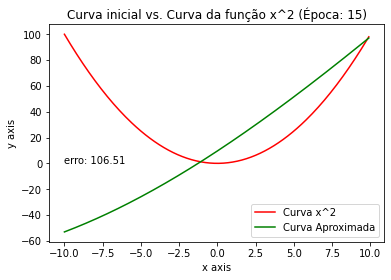

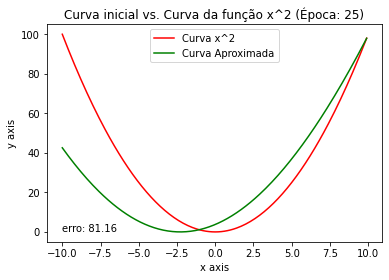

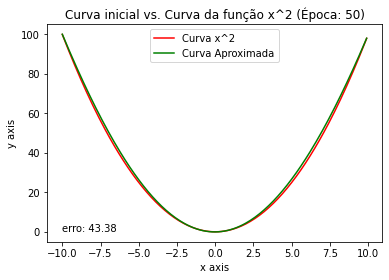

In [18]:
def tsk(step):
    alpha = 0.01
    x_values = np.arange(-10, 10, 0.1)
    error = []

    # Parâmetros iniciais
    p_1, q1, x1_medio, sigma_1 = -1.5, 0.5, -1.0, 0.8
    p_2, q2, x2_medio, sigma_2 = 1.5, -0.5, 1.0, 0.8

    for _ in range(step):
        total_error = 0.0
        
        for x_i in x_values:
            # Cálculo dos parâmetros fuzzy
            w_1, w_2 = calculate_fuzzy_tsk_parameters(x1_medio, sigma_1, x2_medio, sigma_2, x_i)
            
            # Cálculo dos valores ajustados
            y1 = p_1 * x_i + q1
            y2 = p_2 * x_i + q2
            y = ((w_1 * y1) + (w_2 * y2)) / (w_1 + w_2)

            # Cálculo do erro
            yd = x_i ** 2
            e = y - yd
            total_error += 0.5 * (e ** 2)

            # Cálculo das derivadas
            w1_derivada = w_1 / (w_1 + w_2)
            w2_derivada = w_2 / (w_1 + w_2)
            dedp_1 = e * w1_derivada * x_i
            dedp_2 = e * w2_derivada * x_i
            dedq1 = e * w1_derivada
            dedq2 = e * w2_derivada
            dedx1_medio = e * w_2 * ((y1 - y2) / ((w_1 + w_2) ** 2)) * w_1 * ((x_i - x1_medio) / (sigma_1 ** 2))
            dedx2_medio = e * w_2 * ((y2 - y1) / ((w_1 + w_2) ** 2)) * w_1 * ((x_i - x2_medio) / (sigma_2 ** 2))
            dedsigma_1 = e * w_2 * ((y1 - y2) / ((w_1 + w_2) ** 2)) * w_1 * (((x_i - x1_medio) ** 2) / (sigma_1 ** 3))
            dedsigma_2 = e * w_2 * ((y2 - y1) / ((w_1 + w_2) ** 2)) * w_1 * (((x_i - x2_medio) ** 2) / (sigma_2 ** 3))

            # Atualização dos parâmetros
            p_1 -= alpha * dedp_1
            p_2 -= alpha * dedp_2
            q1 -= alpha * dedq1
            q2 -= alpha * dedq2
            sigma_1 -= alpha * dedsigma_1
            sigma_2 -= alpha * dedsigma_2
            x1_medio -= alpha * dedx1_medio
            x2_medio -= alpha * dedx2_medio
        
        error.append(total_error / len(x_values))

    result = []

    for x_i in x_values:
        w_1, w_2 = calculate_fuzzy_tsk_parameters(x1_medio, sigma_1, x2_medio, sigma_2, x_i)
        y1 = p_1 * x_i + q1
        y2 = p_2 * x_i + q2
        y = ((w_1 * y1) + (w_2 * y2)) / (w_1 + w_2)
        result.append(y)

    plot_curve(x_values, result, "%.2f" % round(np.mean(error), 5), step)
    

if __name__ == "__main__":
    steps = [1, 10, 15 ,25, 50]
    for step in steps: # range(1, 100): # 
        tsk(step)